# **FAKE NEWS**
### *DSB08RT_grupo_3_proyecto_2*

#### Preproceso


In [37]:
#------IMPORTAR LIBRERÍAS-------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter
from tqdm import tqdm
import sklearn
import imblearn

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Métodos de Validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas para Clasificación
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# OverSampling y UnderSampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer

In [38]:
## cargar datos y representarlos
df = pd.read_csv("Data/data.csv")
df


id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [39]:
# EDA Exploratiry Data Analisis

df.shape
df.describe()
df.info()
df.isna().sum()
df.shape[0] != df.drop_duplicates("title").shape[0]
df[(df['text'].isna()) & (df['title'].isna())]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Empty DataFrame
Columns: [id, title, author, text, label]
Index: []

# Histogramas: Descripción y Utilidad del gráfico

El gráfico que estamos viendo es un histograma que visualiza la distribución de la longitud de los textos en el dataset de noticias. Desglosamos la info e informamos su su uso: 

Descripción del Gráfico:

-Eje X (Longitud del Texto): Muestra la longitud de los textos, que es la cantidad de caracteres en cada texto. El gráfico está dividido en 30 bins (barras), cada una representando un rango de longitudes de texto.

-Eje Y (Frecuencia): Indica cuántas noticias tienen una longitud de texto dentro del rango especificado por cada barra del histograma.

-Barras: Cada barra del histograma representa el número de noticias cuyos textos caen dentro del rango de longitudes correspondiente. 

La utilidad del gráfico en nuestro proyecto:

El histograma te permite ver rápidamente si la mayoría de los textos son largos o cortos, o si hay una distribución más uniforme a lo largo de diferentes longitudes así mismos si algunas barras son inusualmente altas o bajas, esto podría indicar la presencia de datos atípicos o errores en los datos (por ejemplo, textos extremadamente cortos que podrían no ser informativos o útiles).

Al visualizar la distribución de la longitud del texto, podemos decidir cómo manejar textos muy largos o muy cortos en etapas posteriores del análisis, como en la limpieza de datos o en la preparación de datos para el modelado de machine learning.


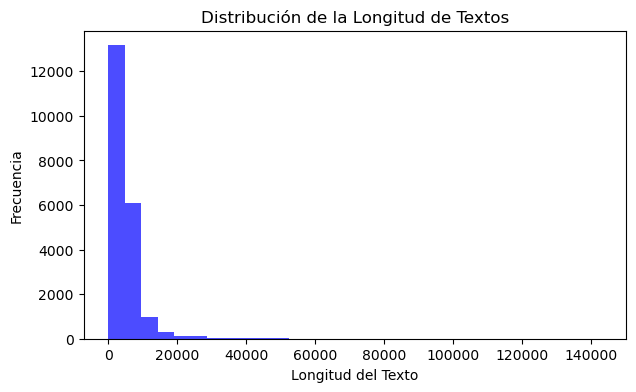

In [40]:
# Crear una nueva columna con la longitud del texto, manejando NaNs
df['text_length'] = df['text'].apply(lambda x: len(x) if type(x) == str else 0)

# Histograma de la longitud del texto
plt.figure(figsize=(7, 4))
plt.hist(df['text_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

# Gráficos de Barras

Este gráfico nos ayudará a visualizar claramente la diferencia entre la cantidad de noticias falsas y verdaderas en nuestro dataset, con una representación visual clara y con números exactos que proporcionan datos precisos.

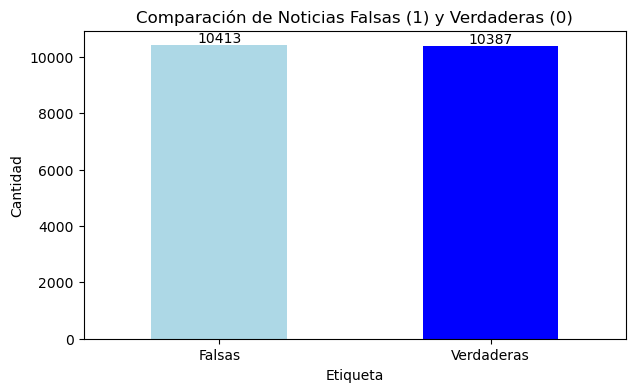

In [41]:
# Contar ocurrencias de cada etiqueta
counts = df['label'].value_counts()

# Crear el gráfico de barras
ax = counts.plot(kind='bar', color=['lightblue', 'blue'], figsize=(7, 4))

# Añadir título y etiquetas
plt.title('Comparación de Noticias Falsas (1) y Verdaderas (0)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Falsas', 'Verdaderas'], rotation=0)

# Anotar cada barra con el valor exacto
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

# Boxplots

Nos ayudarán a observar la dispersión y detectar valores atípicos en la longitud de los textos, por ejemplo destacamos: 


- Tanto para la etiqueta "0" como para la "1", la caja (que representa desde el primer cuartil (Q1) hasta el tercer cuartil (Q3)) es relativamente pequeña en comparación con el rango total de los datos. Esto indica que la mayoría de los textos en cada grupo tienen longitudes bastante similares.

- La línea horizontal en cada caja, que representa la mediana, se sitúa cerca del extremo inferior de la caja, sugiriendo que la distribución de las longitudes de texto es asimétrica con una cola más larga hacia el extremo superior.

- Hay una cantidad significativa de valores atípicos en ambos grupos, especialmente en la categoría "1". Estos valores representan textos anormalmente largos en comparación con el resto del grupo.

Este boxplot nos es útil para identificar diferencias y similitudes en la distribución de la longitud del texto entre dos categorías ayudándonos a visualizar rápidamente si un grupo tiende a tener textos más largos o más cortos. Además la presencia de valores atípicos puede influir en decisiones sobre cómo preprocesar los datos para análisis posteriores o de nuestro entrenamiento de modelos de machine learning.



<Figure size 700x400 with 0 Axes>

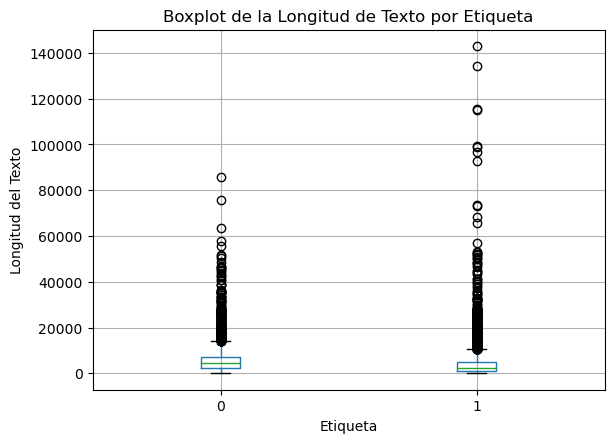

In [42]:
plt.figure(figsize=(7, 4))
df.boxplot(column='text_length', by='label')
plt.title('Boxplot de la Longitud de Texto por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Longitud del Texto')
plt.suptitle('')
plt.show()

# Mapas de Calor

Para visualizar correlaciones entre diferentes variables numéricas y ver si realmente la longitud del texto puede impactar en si la noticia es falsa o no, realizamos un mapa de calor. 

El mapa de calor generado es una representación visual de la matriz de correlación entre dos variables del dataset: la longitud del texto (text_length) y la etiqueta (label).

El valor de correlación es -0.13, nos indica una correlación negativa muy débil entre la longitud del texto y la etiqueta. Esto sugiere que no hay una relación lineal fuerte entre si una noticia es falsa o verdadera y la longitud del texto de la noticia. La débil correlación sugiere que la longitud del texto, por sí sola, no es un indicador fuerte de si una noticia es falsa o verdadera. Esto podría implicar que para tareas de clasificación o análisis, se deberían considerar otras características del texto además de su longitud.

Por lo tanto, en el dsarrollo de nuestros modelos de machine learning vamos a necesitar integrar otras variables o características textuales (como la complejidad del texto, la presencia de ciertas palabras clave, análisis de sentimientos, etc.) para mejorar la capacidad del modelo.

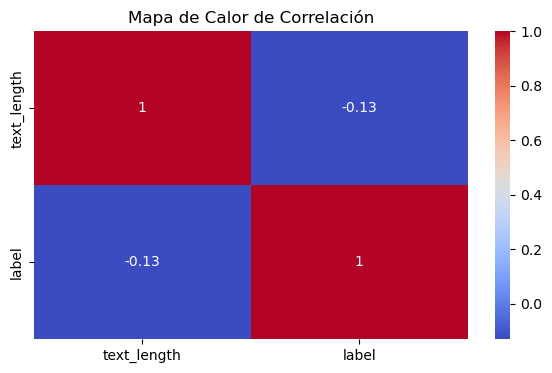

In [43]:
# Correlaciones
correlation_matrix = df[['text_length', 'label']].corr()  

# Mapa de calor
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

### Duplicados y NaN´s

In [44]:
# Se crea la columna 'texto' con la unión de las columnas 'title' y 'text'. Será la que se emplee para el análisis.
df['text'].fillna('', inplace=True)
df['title'].fillna('', inplace=True)
df['texto'] = df['title'] + ' ' + df['text']

In [45]:
df['texto'].isna().sum()

0

In [46]:
df[df.duplicated("texto")]


id                                              title        author  \
1292    1292                                                        Anonymous   
1808    1808                                                        Anonymous   
1974    1974                                                        Anonymous   
2120    2120                                                        Enjoykin4   
3039    3039  UNAIRED Documentary Illuminati Child Abduction...      Pakalert   
...      ...                                                ...           ...   
20632  20632  Social Justice Attorney Andrea Burton: Jailed ...  Bill Quigley   
20652  20652  Jeddah airport was targeted by Ansar Allah mis...           NaN   
20728  20728  Trump warns of World War III if Clinton is ele...           NaN   
20749  20749  Realities Faced by Black Canadians are a Natio...     Anonymous   
20754  20754                     No More American Thanksgivings     Glen Ford   

                                                    text  label  text_length  \
1292   Same people all the time , i dont know how you...      1          135   
1808   Same people all the time , i dont know how you...      1          135   
1974   Same people all the time , i dont know how you...      1          135   
2120   A leading US senator: US Supporting War in Syr...      1         5289   
3039   Support Us UNAIRED Documentary Illuminati Chil...      1           76   
...                                                  ...    ...          ...   
20632  Tweet Widget by Bill Quigley \nA young Black l...      1        12682   
20652  Email \n\nAn informed source in Yemen's AnsarA...      1          943   
20728  Email Donald Trump warned in an interview Tues...      1         4537   
20749  Tweet Widget by Robyn Maynard \nCanada, includ...      1         4877   
20754  Thanksgiving by Glen Ford \n“The core ideologi...      1        27298   

                                                   texto  
1292    Same people all the time , i dont know how yo...  
1808    Same people all the time , i dont know how yo...  
1974    Same people all the time , i dont know how yo...  
2120    A leading US senator: US Supporting War in Sy...  
3039   UNAIRED Documentary Illuminati Child Abduction...  
...                                                  ...  
20632  Social Justice Attorney Andrea Burton: Jailed ...  
20652  Jeddah airport was targeted by Ansar Allah mis...  
20728  Trump warns of World War III if Clinton is ele...  
20749  Realities Faced by Black Canadians are a Natio...  
20754  No More American Thanksgivings Thanksgiving by...  

[110 rows x 7 columns]

In [47]:
# Se eliminan los duplicados y las columnas que no interesan
df = df.drop_duplicates('texto')
df = df.drop(['id', 'title', 'text'], axis=1)
df

author  label  text_length  \
0                                  Darrell Lucus      1         4930   
1                                Daniel J. Flynn      0         4160   
2                             Consortiumnews.com      1         7692   
3                                Jessica Purkiss      1         3237   
4                                 Howard Portnoy      1          938   
...                                          ...    ...          ...   
20795                              Jerome Hudson      0         1814   
20796                           Benjamin Hoffman      0         6059   
20797  Michael J. de la Merced and Rachel Abrams      0         4799   
20798                                Alex Ansary      1         1773   
20799                              David Swanson      1         7043   

                                                   texto  
0      House Dem Aide: We Didn’t Even See Comey’s Let...  
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2      Why the Truth Might Get You Fired Why the Trut...  
3      15 Civilians Killed In Single US Airstrike Hav...  
4      Iranian woman jailed for fictional unpublished...  
...                                                  ...  
20795  Rapper T.I.: Trump a ’Poster Child For White S...  
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...  
20797  Macy’s Is Said to Receive Takeover Approach by...  
20798  NATO, Russia To Hold Parallel Exercises In Bal...  
20799  What Keeps the F-35 Alive   David Swanson is a...  

[20690 rows x 4 columns]

#### Preprocesamiento del texto


A continuación realizamos una serie de pasos para el preprocesamiento de textos en un DataFrame utilizando la biblioteca Natural Language Toolkit (NLTK). Estos pasos son esenciales para la preparación de datos en procesos de NLP (Natural Language Processing) como la clasificación de texto o análisis de sentimientos. Aquí desgloso cada parte del código:

1. Cargamos las stopwords del inglés desde NLTK, que son palabras comunes ("the", "is", "in", etc.) que generalmente se eliminan en el análisis de texto porque suelen aportar poco valor semántico y son muy frecuentes.

2. Función limpiar_texto: Convierte todo el texto a minúsculas para homogeneizar la capitalización y el filtrado de caracteres recorre cada carácter del texto, incluyendo solo aquellos que son alfanuméricos o espacios. Esto elimina puntuación y caracteres especiales que podrían afectar el análisis.

3. Función tokenizar_eliminar_stopwords: La Tokenización divide el texto en palabras o "tokens" utilizando la función word_tokenize de NLTK y la eliminación de stopwords, filtra los tokens, eliminando aquellos que están en la lista de stopwords.

4. Funciones tokens_stemmer y tokens_lemmatizer: Utilizamos el PorterStemmer de NLTK para reducir cada token a su raíz o forma base, lo que ayuda a reducir la variabilidad de las palabras (por ejemplo, "running" a "run") y utilizamos el WordNetLemmatizer para llevar las palabras a su forma lematizada basada en un diccionario (por ejemplo, "better" a "good").

5. Aplicación de Funciones para Procesar Texto con Stemmer y Lemmatizer. Aquí, cada texto en la columna df['texto'] es procesado a través de las funciones definidas. 

Primero se limpia, luego se tokeniza y elimina stopwords, y finalmente se aplica stemming o lematización. El resultado de cada paso se almacena en nuevas columnas en el DataFrame para análisis posteriores.

Este proceso es crucial para que preparemos los datos de texto para tareas de NLP, facilitando una mejor interpretación y análisis por modelos de machine learning al reducir la complejidad y aumentar la uniformidad del texto.


In [48]:
STOPWORDS = nltk.corpus.stopwords.words("english")

In [49]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto_limpio = ""
    for s in texto:
        if s.isalnum() or s.isspace():
            texto_limpio += s
    return texto_limpio

In [50]:
def tokenizar_eliminar_stopwords(texto):
    tokens = nltk.word_tokenize(text = texto)
    tokens = [token for token in tokens if token not in STOPWORDS]
    return tokens

In [51]:
def tokens_stemmer(tokens):   # probar tb con lemmatizer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

In [52]:
def tokens_lemmatizer(tokens):   # probar tb con lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

In [53]:
# Se genera el texto procesado mediante Stemmer
df['texto_procesado_stem'] = df['texto'].apply(limpiar_texto)
df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokenizar_eliminar_stopwords)
df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokens_stemmer)

In [54]:
# Se genera el texto procesado mediante Lemmatizer
df['texto_procesado_lem'] = df['texto'].apply(limpiar_texto)
df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokenizar_eliminar_stopwords)
df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokens_lemmatizer)

#### División de los datos

Con el código informado hemos preparado los datos de texto para el modelado de machine learning, utilizando dos métodos diferentes de procesamiento de texto (Stemming y Lemmatization). A continuación, te explicamos cada paso: 

1. Extracción de Características y Etiquetas con Stemmer, verificando los datos y generando la distribución de las etiquetas, normalizada para mostrar proporciones en lugar de conteos absolutos, lo cual es útil para entender si las clases están balanceadas.

2. Empezamos el entrenamiento y pueba dividiendo el dataset en datos de entrenamiento y de prueba, con el 25% de los datos reservados para prueba. random_state=42 asegura que los resultados sean reproducibles.

3. Vectorizamos convirtiendo el texto en un "bag of words" (bolsa de palabras), limitando a un máximo de 6000 características para evitar dimensiones excesivamente altas.

4. Ordenams el vocabulario generado por el vectorizador por índice.

5 Transformación TF-ID convirtiendo  bag-of-words matrix en una representación TF-IDF, que pondera los términos en función de su importancia en los documentos.

El proceso con lemmatizer sigue los mismos pasos que el stemming, pero usando los textos procesados mediante lematización. Este proceso ayuda a reducir las palabras a su forma base de manera más contextual y precisa que el stemming.

Este código es fundamental para la preparación de datos de texto en aplicaciones de NLP. Al comparar los resultados de stemming y lemmatization, podemos determinar qué técnica de preprocesamiento es más efectiva para nuestro caso. 

In [55]:
# Se procesan los datos obtenidos mediante Stemmer
X = df['texto_procesado_stem'].values
y = df['label'].values

In [56]:
# Comprobamos que los datos están balanceados
pd.Series(y).value_counts(normalize=True)

0    0.50203
1    0.49797
Name: proportion, dtype: float64

In [57]:
X_train, X_test, y_train_stem, y_test_stem = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
count_vectorizer = CountVectorizer(max_features = 6000)

bag_train = count_vectorizer.fit_transform(X_train)

bag_test = count_vectorizer.transform(X_test)

In [59]:
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_, key = lambda x : count_vectorizer.vocabulary_[x]) 

In [60]:
tfidf = TfidfTransformer()

bag_tfidf_train_stem = tfidf.fit_transform(bag_train).toarray()

bag_tfidf_test_stem = tfidf.transform(bag_test).toarray()

In [61]:
# Se procesan los datos obtenidos mediante Lemmatizer
X = df['texto_procesado_lem'].values
y = df['label'].values

X_train, X_test, y_train_lem, y_test_lem = train_test_split(X, y, test_size = 0.25, random_state = 42)

count_vectorizer = CountVectorizer(max_features = 6000)

bag_train = count_vectorizer.fit_transform(X_train)

bag_test = count_vectorizer.transform(X_test)
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_, key = lambda x : count_vectorizer.vocabulary_[x]) 
tfidf = TfidfTransformer()

bag_tfidf_train_lem = tfidf.fit_transform(bag_train).toarray()

bag_tfidf_test_lem = tfidf.transform(bag_test).toarray()

In [62]:
print(sorted(count_vectorizer.vocabulary_.items()))

[('000', 0), ('10', 1), ('100', 2), ('1000', 3), ('10000', 4), ('100000', 5), ('11', 6), ('12', 7), ('120', 8), ('125', 9), ('13', 10), ('14', 11), ('15', 12), ('150', 13), ('16', 14), ('17', 15), ('18', 16), ('19', 17), ('1948', 18), ('1950s', 19), ('1960s', 20), ('1964', 21), ('1967', 22), ('1968', 23), ('1970s', 24), ('1973', 25), ('1979', 26), ('1980', 27), ('1980s', 28), ('1984', 29), ('1986', 30), ('1987', 31), ('1988', 32), ('1989', 33), ('1990', 34), ('1990s', 35), ('1991', 36), ('1992', 37), ('1993', 38), ('1994', 39), ('1995', 40), ('1996', 41), ('1997', 42), ('1998', 43), ('1999', 44), ('19th', 45), ('20', 46), ('200', 47), ('2000', 48), ('2001', 49), ('2002', 50), ('2003', 51), ('2004', 52), ('2005', 53), ('2006', 54), ('2007', 55), ('2008', 56), ('2009', 57), ('2010', 58), ('2011', 59), ('2012', 60), ('2013', 61), ('2014', 62), ('2015', 63), ('2016', 64), ('2017', 65), ('2018', 66), ('2020', 67), ('20th', 68), ('21', 69), ('21st', 70), ('22', 71), ('23', 72), ('24', 73), (

#### Modelos

In [63]:
modelos = [KNeighborsClassifier(),
           # RadiusNeighborsClassifier(),
           NearestCentroid(),
           LogisticRegression(),
           GaussianNB(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           SVC(),
           AdaBoostClassifier(),
           GradientBoostingClassifier()]

In [ ]:
%%time

datos = list()

for model in tqdm(modelos):
    for suffix in tqdm(['_stem','_lem']):
        bag_tfidf_train = globals()['bag_tfidf_train'+suffix]
        bag_tfidf_test = globals()['bag_tfidf_test'+suffix]
        y_test = globals() ['y_test'+suffix]
        y_train = globals() ['y_train'+suffix]

        model.fit(bag_tfidf_train, y_train)
        
        yhat = model.predict(bag_tfidf_test)
        
        jaccard   = jaccard_score(y_test, yhat)
        accuracy  = accuracy_score(y_test, yhat)
        precision = precision_score(y_test, yhat)
        recall    = recall_score(y_test, yhat)
        f1        = f1_score(y_test, yhat)
        roc_auc   = roc_auc_score(y_test, yhat)
        cm        = confusion_matrix(y_test, yhat)    
        
        datos.append([(str(model)+suffix), model, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model_name", "model", "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]



In [ ]:
df_metricas = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas.sort_values("accuracy", ascending = False)

### GridSearchCV
- Observamos que los resultados obtenidos mediante Lemmatizer y Stemmer son casi idénticos, a partir de aquí se emplearán los obtenidos mediante Lemmatizer
- Se define en un diccionario los parámetros de cada modelo. 
- Se ejecuta el GridSearchCV para cada modelo. Debido a los tiempos de computación se ha decidido realizar este proceso para el modelo que mejor resultados arroja, el GradientBoostingClassifier. También se aplicará al SVC, que es el siguiente mejor que no emplea árboles de decisión.

In [ ]:
bag_tfidf_train = bag_tfidf_train_lem
bag_tfidf_test = bag_tfidf_test_lem
y_test = y_test_lem
y_train = y_train_lem

In [ ]:
modelos = {    SVC():                   {
                                        "kernel": ['linear', 'poly', 'rbf'],
                                        "C": [0.5, 1, 2],
                                        "random_state":[42]
                                        },   
               GradientBoostingClassifier(): {
                                        'n_estimators'  :  [150, 200, 250, 300],
                                        'learning_rate' :  [0.05, 0.1, 0.15],
                                        'max_depth'     :  [2,3,4],
                                        'subsample'     :  [0.5, 1]                                     
                                   }
                                   }

In [ ]:
'''modelos = { 
    KNeighborsClassifier() : {
                                        "n_neighbors"  : [1+2*i for i in range(40)],
                                        "algorithm"    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
        
           NearestCentroid() :      {
                                        "metric"  : ['euclidean'],
                                        },
           LogisticRegression():    {
                                        'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
                                        'dual' : [False, True],
                                        'solver': ['lbfgs', 'newton-cholesky'],
                                        'n_jobs'  : [-1],
                                        "multi_class "    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
           GaussianNB() : {
                                        'priors' : ['None']
                                        },
           DecisionTreeClassifier(): {
                                        'criterion'         : ["gini", "entropy"],
                                        'splitter'          : ["best", "random"],
                                        'max_depth'         : [2*i for i in range (3,40,2)],
                                        'min_samples_split' : [j for j in range (2,11)],
                                        'max_features'      : ["sqrt", "log2", None],
                                        'random_state'      : 42,
                                        'max_leaf_nodes'    : 10
                                        },
           RandomForestClassifier(): {
                                        "n_estimators"           : [100, 150, 200], # Numero de arboles
                                        "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
                                        "max_depth"              : range(12, 25, 3), # La profundidad máxima del árbol.
                                        "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split
                                        "max_leaf_nodes"         : range(90, 151, 10), # Maximo de nodos hoja del arbol
                                        "min_impurity_decrease"  : [0.0, 0.1, 0.2, 0.3], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
                                        "min_samples_split"      : [2, 10, 15, 20], # El número mínimo de muestras requeridas para llegar a nodo hoja.
                                        "random_state"           : [42]
                                        },
           SVC():                   {
                                        "kernel": ['linear', 'poly', 'rbf'],
                                        "C": [0.5, 1, 2],
                                        "random_state":[42]
                                        },
           AdaBoostClassifier() : {
                                        "n_estimators"   : [i*25 for i in range(2, 8)],
                                        'algorithm' : ['SAMME', 'SAMME.R']
                                        },
           GradientBoostingClassifier(): {
                                        'n_estimators'  :  [100, 150, 200, 250, 300],
                                        'learning_rate' :  [0.05, 0.1, 0.15],
                                        'max_depth'     :  [2,3,4],
                                        'subsample'     :  [0.5, 1]                                     
                                   }
                                   }'''

In [ ]:
%%time

datos = list()

for model, params in tqdm(modelos.items()):
    
    scorers = ["f1_macro", "accuracy", "recall_macro", "roc_auc"]
    grid_solver = GridSearchCV(estimator  = model, 
                       param_grid = params    , 
                       scoring    = scorers   ,
                       cv         = 5         ,
                       refit      = "roc_auc" 
                       )
    model_result = grid_solver.fit(bag_tfidf_train, y_train)
    model_result.best_estimator_.get_params()
    
    yhat = model_result.best_estimator_.predict(bag_tfidf_test)
    
    jaccard   = jaccard_score(y_test, yhat, average = "macro")
    accuracy  = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average = "macro")
    recall    = recall_score(y_test, yhat, average = "macro")
    f1        = f1_score(y_test, yhat, average = "macro")
    roc_auc   = roc_auc_score(y_test, yhat)
    cm        = confusion_matrix(y_test, yhat)    
    params_top= model_result.best_estimator_.get_params()
    
    datos.append([(str(model)+suffix), model, params_top, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model_name", "model",'params_top', "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]

## Validación